## 23. Capstone
- Final Capstone - use NLP 
    - and we can combine Deep learning 

The dataset used for this analysis can be found using the following link: https://www.kaggle.com/wendykan/lending-club-loan-data


About the data

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables.



We will go step by step for building a machine learning algorith for the prediction of loan defaulters based on certain variables present in the dataset. Our main goal is to correctly identifying defaulter's (True positives) so that lending club can decide whether a person is fit for sanctioning a loan or not in the future.



loan_amnt                     amount of money requested by the borrower
funded_amnt                   The total amount committed to that loan at that point in time.
funded_amnt_inv               The total amount committed by investors for that loan at that point in time.

###### showing all rows and columns 
- pd.set_option('display.max_columns', 500)
- pd.set_option('display.max_rows', 500)

#### check code before submission
http://pep8online.com/

In [1]:
### importing all libraries

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
%matplotlib inline 

from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from scipy.stats import yeojohnson

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.naive_bayes import BernoulliNB # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # 
from sklearn.linear_model import LogisticRegression #
from sklearn import ensemble #boosting
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression #
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM



#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from scipy.stats import boxcox

# These two lines let you show all the columns and rows
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [2]:
df_temp = pd.read_csv('loan.csv')

## Load the dataset

In [3]:
# lets look at some data to see how they look
df_temp.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [4]:
df_original = df_temp.copy()

In [5]:
### take a look at the data and see what format they are
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


From the information above, it seems like there are 2260668 rows, 145 columns. That's a lot of data. So lets start filtering some out.

## Detect the problems with the data
* Detect the problems with the data such as missing values and outliers. 
* Are there any features that does not add any value to our target variable which is the "Loan status" 

Text(0, 0.5, 'Data type')

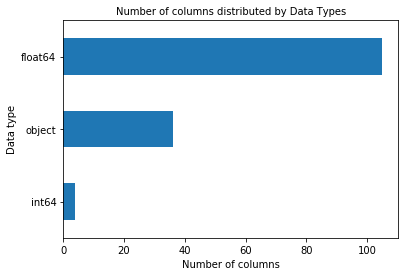

In [6]:
# Lets find out the Number of each type of columns we have so we know what 
# sort of data we are working with
df_temp.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=10)
plt.xlabel('Number of columns')
plt.ylabel('Data type')

In [7]:
## Do we have any missing values?
df_temp.isnull().sum()*100/df_temp.isnull().count()

### other ways to see missing value
### use value_counts()

id                       100.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         98.537777
settlement_date           98.537777
settlement_amount         98.537777
settlement_percentage     98.537777
settlement_term           98.537777
Length: 145, dtype: float64

* Looks like there are a lot of missing values. 
* I am going to use a threshold of 70% to eliminate some of the data. So the columns that have 70% null values, I will drop them. 

In [8]:
df_drop_col_70 = df_temp.dropna(axis=1, thresh=int(0.70*len(df_temp)))

In [9]:
df_drop_col_70.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 87 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          object
int_rate                      float64
installment                   float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              object
inq_last_6mths                fl

* That brought the columns down to 87 columns. 
* Now lets look at the data a bit carefully and see if there are other columns that are not
needed for our purpose. Again our goal is to predict who will default on their load and 
right now I am trying to find the features that can help predict that.

In [9]:
df_drop_col_70.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Feb-2019,0.0,1,Individual,0.0,0.0,16901.0,42000.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Feb-2019,0.0,1,Individual,0.0,1208.0,321915.0,50800.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Feb-2019,0.0,1,Individual,0.0,0.0,110299.0,24100.0,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,14.0,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,Feb-2019,146.51,Feb-2019,0.0,1,Individual,0.0,686.0,305049.0,7000.0,5.0,30505.0,1239.0,75.2,0.0,0.0,62.0,154.0,64.0,5.0,3.0,64.0,5.0,0.0,1.0,2.0,1.0,2.0,7.0,2.0,3.0,2.0,10.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,0.0,0.0,Feb-2019,731.78,Feb-2019,0.0,1,Individual,0.0,0.0,116007.0,23100.0,9.0,9667.0,8471.0,8.9,0.0,0.0,53.0,216.0,2.0,2.0,2.0,2.0,13.0,0.0,2.0,2.0,3.0,8.0,9.0,6.0,15.0,2.0,12.0,0.0,0.0,0.0,5.0,92.3,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


Let us see how many categorical data do the columns having 'object' data types contain:

In [10]:
df_drop_col_70.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                         2
grade                        7
sub_grade                   35
emp_title               512694
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
loan_status                  9
pymnt_plan                   2
purpose                     14
title                    63155
zip_code                   956
addr_state                  51
earliest_cr_line           754
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

* sub_grade                   35
* emp_title               512694
* last_pymnt_d               135
* last_credit_pull_d 
* issue_d                    139
* title                    63155
* zip_code                   956
* addr_state                  51
* earliest_cr_line           754
* last_pymnt_d               135
* last_credit_pull_d         140

These will not be very good since they have too many categories


* Looking at the columns, I am going to identify the features that are most likely to put someone at defaulting the loan. I will start with a lot of features and then cut it down.

* Here are the features at first cut - I will takes these features from the dataframe and look deeper into them

['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','purpose','dti','delinq_2yrs','revol_bal', 'total_pymnt', 'acc_now_delinq', 'tot_coll_amt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag', loan_status']

* The other features does is not of much interest to me. It does not seem like they will play a role in predicting the defaulter

In [11]:
### taking certain features and saving it into a new df

df_loan_default_features = df_drop_col_70.filter(['loan_amnt','term','int_rate','installment',
                                             'grade','emp_length',
                                             'home_ownership','annual_inc','verification_status',
                                             'purpose','dti','delinq_2yrs','revol_bal', 
                                             'total_pymnt', 'acc_now_delinq', 'tot_coll_amt', 
                                             'pub_rec_bankruptcies', 'tax_liens', 
                                             'hardship_flag', 'loan_status'])

In [12]:
# Lets kep a copy of this dataframe since this is a bit clean
df_loan_default_features_orig = df_loan_default_features.copy()

In [52]:
####df_loan_default_features = df_loan_default_features_orig.copy()

In [14]:
# Loan_default_features_df.info()

Lets look to see how much missing values are there in these few features

In [13]:
df_loan_default_features.isnull().sum()*100/df_loan_default_features.isnull().count()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              6.498389
home_ownership          0.000000
annual_inc              0.000177
verification_status     0.000000
purpose                 0.000000
dti                     0.075686
delinq_2yrs             0.001283
revol_bal               0.000000
total_pymnt             0.000000
acc_now_delinq          0.001283
tot_coll_amt            3.108639
pub_rec_bankruptcies    0.060380
tax_liens               0.004645
hardship_flag           0.000000
loan_status             0.000000
dtype: float64

There are some missing values. There is enough data so we can drop the rows that have null values

In [14]:
## dropping the null rows 
df_loan_default_features.dropna(axis=0, inplace=True)

In [15]:
# this should have no missing values
df_loan_default_features.isnull().sum()*100/df_loan_default_features.isnull().count()

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
revol_bal               0.0
total_pymnt             0.0
acc_now_delinq          0.0
tot_coll_amt            0.0
pub_rec_bankruptcies    0.0
tax_liens               0.0
hardship_flag           0.0
loan_status             0.0
dtype: float64

In [16]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045433 entries, 0 to 2260667
Data columns (total 20 columns):
loan_amnt               int64
term                    object
int_rate                float64
installment             float64
grade                   object
emp_length              object
home_ownership          object
annual_inc              float64
verification_status     object
purpose                 object
dti                     float64
delinq_2yrs             float64
revol_bal               int64
total_pymnt             float64
acc_now_delinq          float64
tot_coll_amt            float64
pub_rec_bankruptcies    float64
tax_liens               float64
hardship_flag           object
loan_status             object
dtypes: float64(10), int64(2), object(8)
memory usage: 327.7+ MB


At this point we have 2045433 rows rather than  2260668 rows that we started with and 20 columns rather than 145 that we started with.

In [ ]:
#df_loan_default_features.describe()
#df_loan_default_features.shape
# df_loan_default_features.type

Let's look at histograms to see how the numberical variables are looking at what their distributions are. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109d472d0>,
      dtype=object)

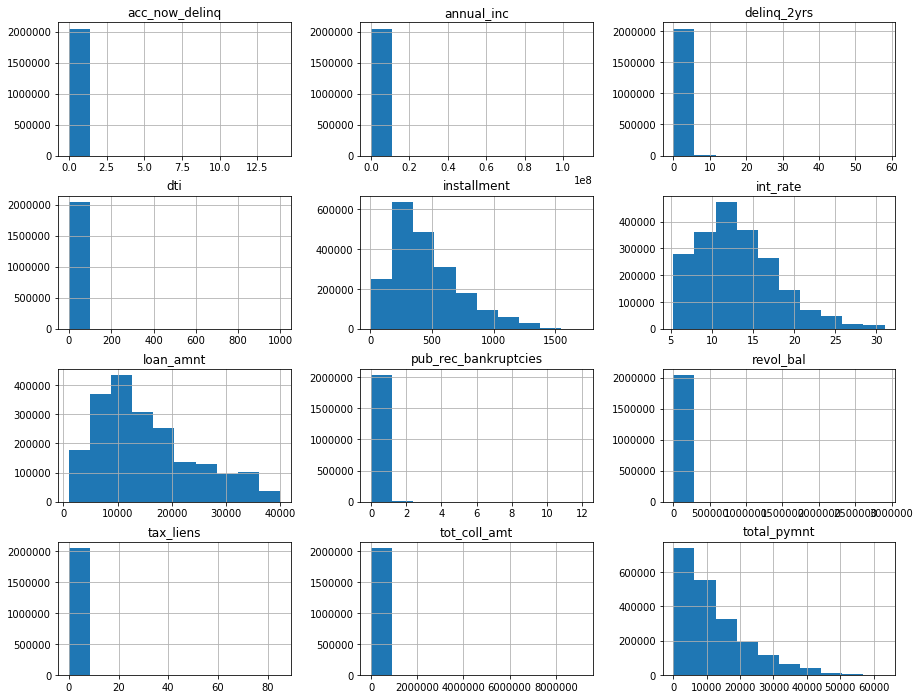

In [17]:
### Lets plot histogram and see the distribution as well as any indication of outliers

#plt.figure(figsize=(15, 12))
df_loan_default_features.hist(figsize=(15, 12))

There are 12 histogram. That means there are 8 columns that are categorical. I want to take a look at the categorical variables and see how they are looking. We can use bar plot, box plot, and violin plots to see what the different categories are.


* loan_amnt               int64
* int_rate                float64
* annual_inc              float64
* installment             float64
* dti                     float64
* delinq_2yrs             float64
* revol_bal               int64
* total_pymnt             float64
* acc_now_delinq          float64
* tot_coll_amt            float64
* pub_rec_bankruptcies    float64
* tax_liens               float64


* term                    object
* grade                   object
* emp_length              object
* home_ownership          object
* verification_status     object
* purpose                 object
* hardship_flag           object

* loan_status             object -> Target variable

Lets look at a few of them a bit carefully - For example, lets see loan_amt, int_rate, annual_inc, dti,
And then we should also look at categorical variable such as emp_length, grade, term

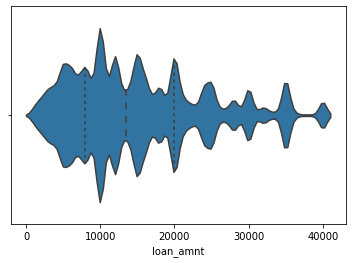

In [18]:
#loan_amnt
#plt.subplots(figsize=(15,6))
sns.violinplot(df_loan_default_features['loan_amnt'],inner="quartile")

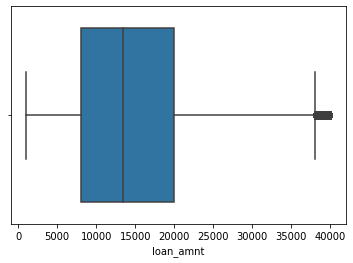

In [19]:
sns.boxplot(df_loan_default_features['loan_amnt'])

Most of the loan amount seems to be within 8 - 20K - and there are outliers, therefore, the distribution is not normal. 

It will probably be a good idea to use Boxcox here and remove outliers, bring the distribution to normal, and then analyze the data.

In [20]:
numerical = numeric_columns = df_loan_default_features.select_dtypes(['int64','float64']).columns
for i in numerical:
    if df_loan_default_features[i].min() > 0:
        transformed, lamb = boxcox(df_loan_default_features.loc[df_loan_default_features[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_loan_default_features.loc[df_loan_default_features[i].notnull(), i] = transformed

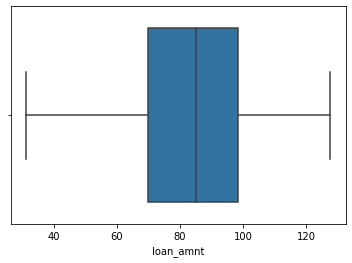

In [21]:
sns.boxplot(df_loan_default_features['loan_amnt'])

It seems like the outliers are taken care of and the loan amount is around 65 -100K

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109d47590>,
      dtype=object)

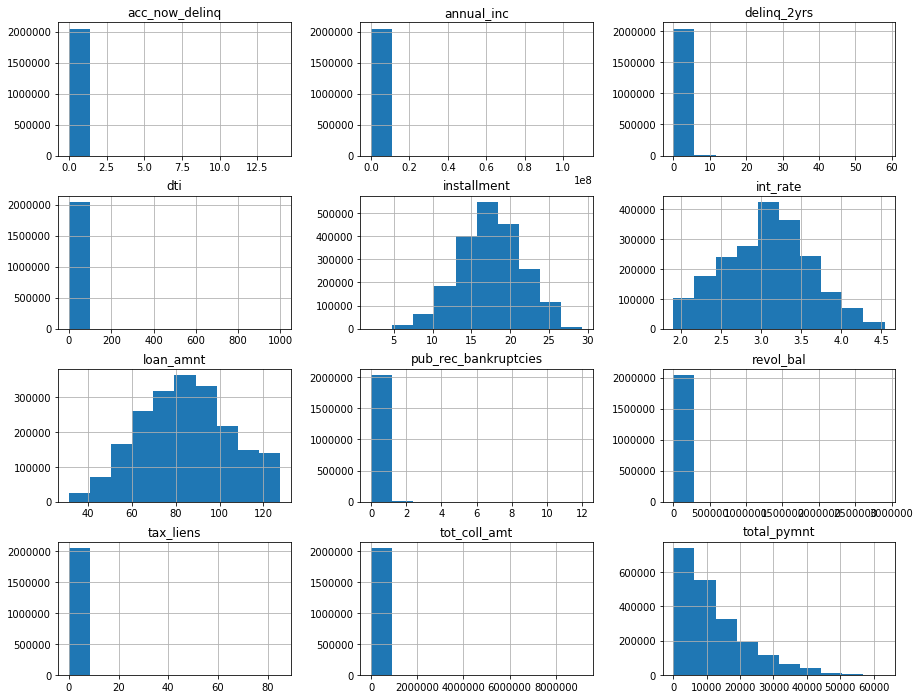

In [22]:
# Lets look at the histograms again after box cox has been applied
df_loan_default_features.hist(figsize=(15, 12))

A lot of the distributions look better than before - e.g., loan_amt, installment, int_rate. - we have established that most of the loan amounts are between 65 - 100. Lets look at the int rate and installment and see what they tell us

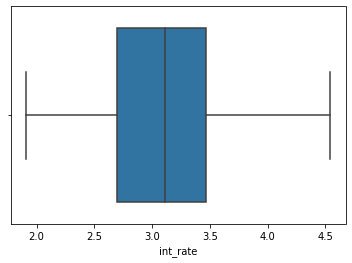

In [23]:
sns.boxplot(df_loan_default_features['int_rate'])

Looks like most interest rates are between 2.7 - 3.5% 

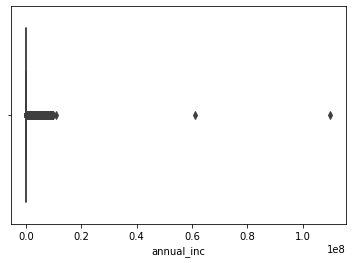

In [24]:
sns.boxplot(df_loan_default_features['annual_inc'])

In [25]:
df_loan_default_features['annual_inc'].describe()

count    2.045433e+06
mean     8.031272e+04
std      1.166170e+05
min      0.000000e+00
25%      4.826800e+04
50%      6.780400e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

Looks like Annual income has outliers which was not taken care of my box cox. The mean is 80312.72 whereas the max is 110000000 - So we should take care of this

In [26]:
annual_inc = df_loan_default_features["annual_inc"].quantile(0.990)
df_loan_default_features = df_loan_default_features[df_loan_default_features["annual_inc"] < annual_inc]

In [ ]:
#df_loan_default_features['annual_inc'].describe()

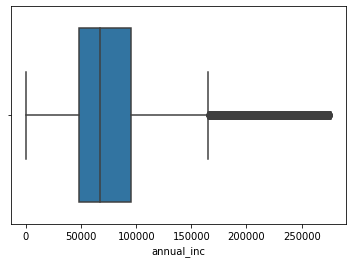

In [27]:
sns.boxplot(df_loan_default_features['annual_inc'])
#sns.violinplot(df_loan_default_features['annual_inc'],inner="quartile")

Looks like most annual incomes are between 50 - 100K

In [28]:
#df_loan_default_features['acc_now_delinq'].value_counts()
#df_loan_default_features['delinq_2yrs'].value_counts()
#df_loan_default_features['dti'].value_counts()
#df_loan_default_features['pub_rec_bankruptcies'].value_counts()
#df_loan_default_features['revol_bal'].value_counts()
#df_loan_default_features['tax_liens'].value_counts()
#df_loan_default_features['tot_coll_amt'].value_counts()

In [68]:
#df_features_temp = df_loan_default_features.copy()

In [80]:
#df_loan_default_features = df_features_temp.copy()

Our target variable is loan status - so lets take a look at that

In [29]:
df_loan_default_features['loan_status'].value_counts()

Fully Paid            922635
Current               840899
Charged Off           230091
Late (31-120 days)     19767
In Grace Period         8276
Late (16-30 days)       3261
Default                   28
Name: loan_status, dtype: int64

The `loan_status` is our target variable. However we are interested in `default`. However there are only 28 defults. so the data is not so balanced here - from the data above, people who are Current, Charged Off, Late (31-120 days), In Grace Period, Late (16-30 days) are all in risk of defaulting. So we can take all of those and merge it under `default`.

In [ ]:
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Current']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'In Grace Period']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (16-30 days)']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (31-120 days)']

In [30]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Current']

In [31]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'In Grace Period':'Default'})

In [32]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Late (16-30 days)':'Default'})

In [33]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Late (31-120 days)':'Default'})

In [34]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Charged Off':'Default'})

In [35]:
df_loan_default_features['loan_status'].value_counts()

Fully Paid    922635
Default       261423
Name: loan_status, dtype: int64

In [36]:
### 0 being Fully paid and 1 being Default
df_loan_default_features.loan_status=df_loan_default_features.loan_status.astype('category').cat.codes

In [37]:
df_loan_default_features['loan_status'].value_counts()

1    922635
0    261423
Name: loan_status, dtype: int64

In [38]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184058 entries, 100 to 2260664
Data columns (total 20 columns):
loan_amnt               1184058 non-null float64
term                    1184058 non-null object
int_rate                1184058 non-null float64
installment             1184058 non-null float64
grade                   1184058 non-null object
emp_length              1184058 non-null object
home_ownership          1184058 non-null object
annual_inc              1184058 non-null float64
verification_status     1184058 non-null object
purpose                 1184058 non-null object
dti                     1184058 non-null float64
delinq_2yrs             1184058 non-null float64
revol_bal               1184058 non-null int64
total_pymnt             1184058 non-null float64
acc_now_delinq          1184058 non-null float64
tot_coll_amt            1184058 non-null float64
pub_rec_bankruptcies    1184058 non-null float64
tax_liens               1184058 non-null float64
hardship_fl

In [39]:
#df_loan_default_features.hist(figsize=(15, 12))

<Figure size 2160x1440 with 0 Axes>

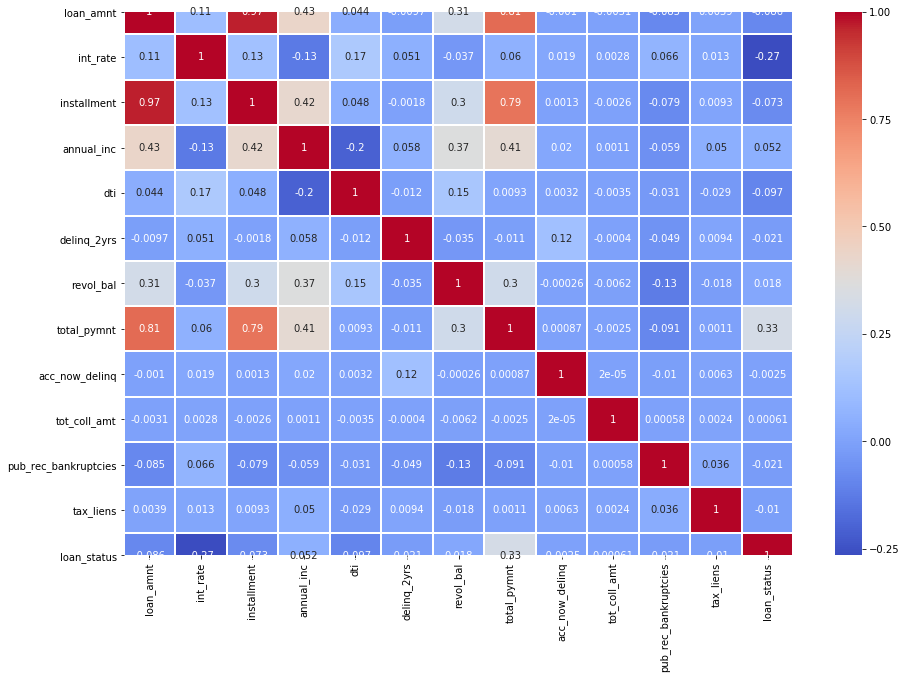

In [40]:
### lets look at the data correlation for only the continuous variables for now

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

I am going to use a cut off of 60% to eliminate features that are highly correlated to each other. and the same amount of 60% to see which features are correlated to the loan status later on

* It seems like total payment and loan amt are highly corrlated to each other - (we might want to elimindate total_payment)

* It seems like total payment and installments are highly correlated to each other - (we might want to eliminate total payment) 
* Intallment and loan amount are highly correlated as well - - this makes sense since a person who takes a large sum of loan would require extra time to repay it back. --- drop installment

In [41]:
## Dropping total_payment
df_loan_default_features.drop('total_pymnt', axis=1, inplace=True)

In [42]:
## Dropping installment
df_loan_default_features.drop('installment', axis=1, inplace=True)

<Figure size 2160x1440 with 0 Axes>

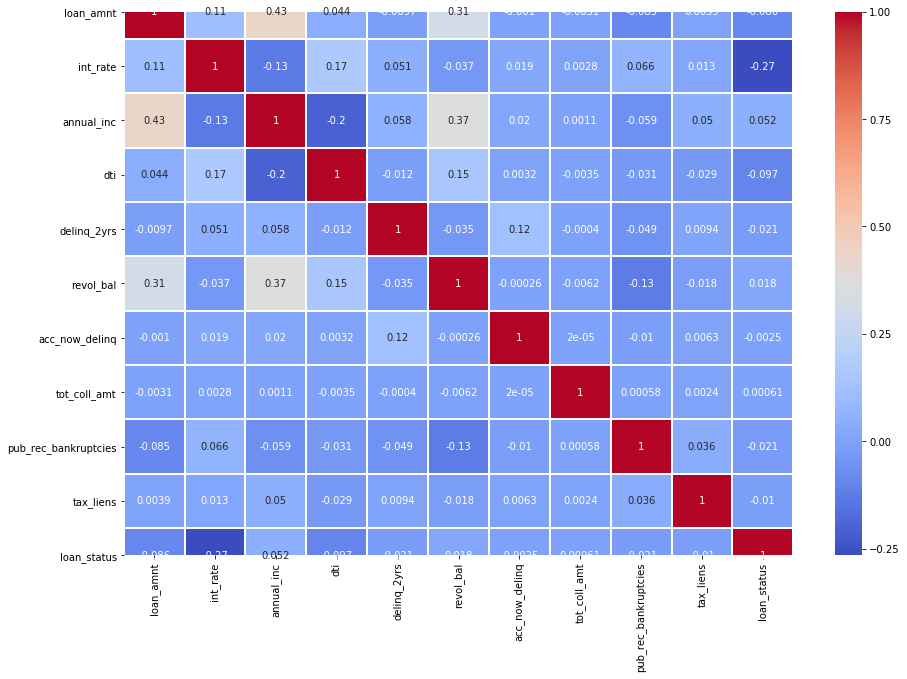

In [43]:
### lets look at the data correlation for only the continuous variables for now

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

In [44]:
### Saving a copy of the df so far
#df_loan_default_features_orig2 = df_loan_default_features.copy()

Its time to look at the categorical variables

In [45]:
df_loan_default_features['term'].value_counts()

 36 months    885318
 60 months    298740
Name: term, dtype: int64

In [ ]:
### We can also plot it too if we want -

#df_loan_default_features.term.value_counts().plot(kind='bar', figsize=(20, 10))
#plt.title('Term counts')
#plt.xlabel('Term title')
#plt.ylabel('Term counts')

In [46]:
### its only 2 categories so lets change them to numeric
df_loan_default_features.term=df_loan_default_features.term.astype('category').cat.codes

In [108]:
#df_loan_default_features.info()

In [110]:
#df_loan_default_features['term'].value_counts()

In [47]:
df_loan_default_features['grade'].value_counts()

C    343275
B    341455
A    197217
D    180199
E     84538
F     29020
G      8354
Name: grade, dtype: int64

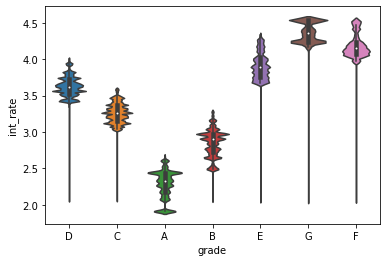

In [48]:
#sns.violinplot(df_loan_default_features['loan_amnt'],inner="quartile")

sns.violinplot(x="grade", y="int_rate", data=df_loan_default_features)

Looks like there maybe a correlation between interest rate and grade - the highter the grade is the higher the interest rate is.

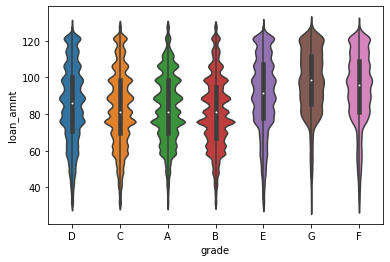

In [49]:
sns.violinplot(x="grade", y="loan_amnt", data=df_loan_default_features)

In [50]:
### Lets convert Grade - numberic
df_loan_default_features.grade=df_loan_default_features.grade.astype('category').cat.codes

In [51]:
df_loan_default_features['grade'].value_counts()

2    343275
1    341455
0    197217
3    180199
4     84538
5     29020
6      8354
Name: grade, dtype: int64

In [52]:
df_loan_default_features['emp_length'].value_counts()

10+ years    418842
2 years      113106
< 1 year     100163
3 years      100064
1 year        82335
5 years       77286
4 years       73836
6 years       57725
8 years       57232
7 years       55572
9 years       47897
Name: emp_length, dtype: int64

Text(0, 0.5, 'emp_length counts')

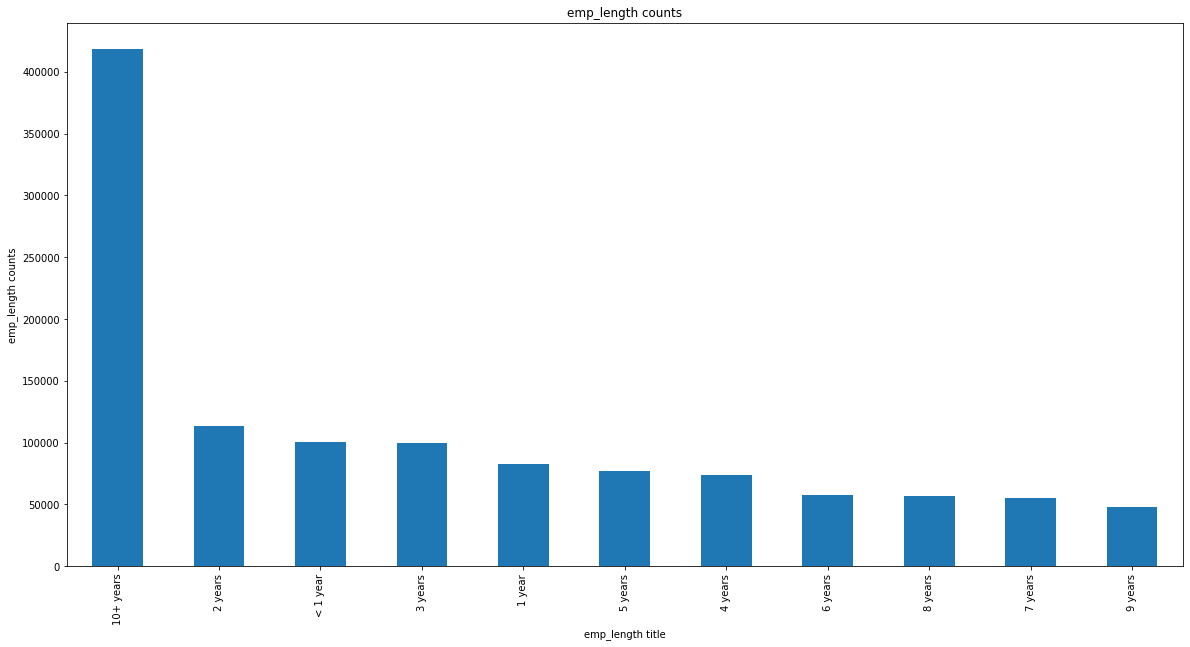

In [53]:
df_loan_default_features.emp_length.value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('emp_length counts')
plt.xlabel('emp_length title')
plt.ylabel('emp_length counts')

Looks like most people who takes loan have job for 10+ years. It might be better to combine them to a little less categories

- 0-4
- 5-9
- 10+


In [ ]:
#df_loan_default_features = df_loan_default_features[df_loan_default_features.emp_length != 'Current']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'In Grace Period']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (16-30 days)']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (31-120 days)']

In [121]:
#df_feat_temp = df_loan_default_features.copy()

In [54]:
df_loan_default_features['emp_length'] = df_loan_default_features['emp_length'].replace({'< 1 year':'0-4 years',
                         '1 year':'0-4 years',
                         '2 years':'0-4 years',
                         '3 years':'0-4 years',
                         '4 years':'0-4 years',
                         '5 years':'5-9 years',
                         '6 years':'5-9 years',
                         '7 years':'5-9 years',
                         '8 years':'5-9 years',
                         '9 years':'5-9 years'})

In [55]:
df_loan_default_features['emp_length'].value_counts()

0-4 years    469504
10+ years    418842
5-9 years    295712
Name: emp_length, dtype: int64

Text(0, 0.5, 'emp_length counts')

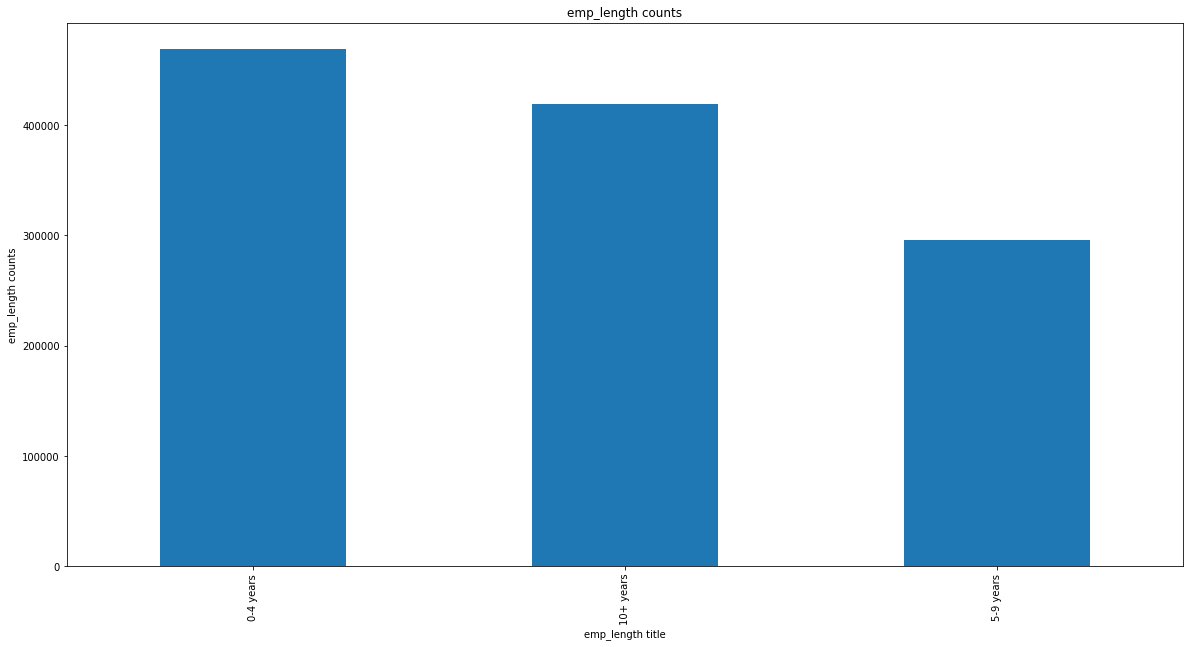

In [56]:
df_loan_default_features.emp_length.value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('emp_length counts')
plt.xlabel('emp_length title')
plt.ylabel('emp_length counts')

In [57]:
### Lets convert emp_length to - numberic
df_loan_default_features.emp_length=df_loan_default_features.emp_length.astype('category').cat.codes

In [58]:
df_loan_default_features['emp_length'].value_counts()

0    469504
1    418842
2    295712
Name: emp_length, dtype: int64

In [59]:
df_loan_default_features['home_ownership'].value_counts()

MORTGAGE    588722
RENT        472578
OWN         122410
ANY            263
NONE            43
OTHER           42
Name: home_ownership, dtype: int64

From the amount of data we have - we could drop any/none/other and just keep it to the 3 categories.

In [60]:
df_feat_temp2 = df_loan_default_features.copy()

In [61]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184058 entries, 100 to 2260664
Data columns (total 18 columns):
loan_amnt               1184058 non-null float64
term                    1184058 non-null int8
int_rate                1184058 non-null float64
grade                   1184058 non-null int8
emp_length              1184058 non-null int8
home_ownership          1184058 non-null object
annual_inc              1184058 non-null float64
verification_status     1184058 non-null object
purpose                 1184058 non-null object
dti                     1184058 non-null float64
delinq_2yrs             1184058 non-null float64
revol_bal               1184058 non-null int64
acc_now_delinq          1184058 non-null float64
tot_coll_amt            1184058 non-null float64
pub_rec_bankruptcies    1184058 non-null float64
tax_liens               1184058 non-null float64
hardship_flag           1184058 non-null object
loan_status             1184058 non-null int8
dtypes: float64(9), i

In [62]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'ANY']

In [63]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'NONE']
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'OTHER']

In [64]:
df_loan_default_features['home_ownership'].value_counts()

MORTGAGE    588722
RENT        472578
OWN         122410
Name: home_ownership, dtype: int64

In [65]:
df_loan_default_features.home_ownership=df_loan_default_features.home_ownership.astype('category').cat.codes

In [66]:
df_loan_default_features['home_ownership'].value_counts()

0    588722
2    472578
1    122410
Name: home_ownership, dtype: int64

* Emp length

0-4 years    469504
10+ years    418842
5-9 years    295712

0    469504
1    418842
2    295712

* Home owndership

MORTGAGE    588722
RENT        472578
OWN         122410
Name: home_ownership, dtype: int64

0    588722
2    472578
1    122410
Name: home_ownership, dtype: int64

In [67]:
df_loan_default_features['verification_status'].value_counts()

Source Verified    479993
Not Verified       358448
Verified           345269
Name: verification_status, dtype: int64

This probably means if the borrowers status and income was verified. This feature has some discrepency - It seems like source verified and verified could be the same - its probably dirty data and its giving it 2 different categories for the same things. I am going to drop this column since it does not seem to be a feature that could be useful for determining a loan defaulter.

In [68]:
df_loan_default_features.drop('verification_status', axis=1, inplace=True)

In [69]:
#df_loan_default_features.info()

In [70]:
df_loan_default_features['purpose'].value_counts()

debt_consolidation    696863
credit_card           262173
home_improvement       74472
other                  65655
major_purchase         24399
medical                13110
small_business         12096
car                    11506
moving                  8012
vacation                7714
house                   6107
wedding                  860
renewable_energy         742
educational                1
Name: purpose, dtype: int64

THe purpose column also does not provide too much info on whether someone will pay loan off or not. and its all over the place - so we should delte that columns too

In [71]:
df_loan_default_features.drop('purpose', axis=1, inplace=True)

In [ ]:
#df_loan_default_features.info()

In [72]:
df_loan_default_features['hardship_flag'].value_counts()

N    1182905
Y        805
Name: hardship_flag, dtype: int64

This is a very unbalanced data - Although hardship flag may say something about whether a person will default or not, this data is very scewed - so we will drop this too

In [73]:
df_loan_default_features.drop('hardship_flag', axis=1, inplace=True)

In [74]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183710 entries, 100 to 2260664
Data columns (total 15 columns):
loan_amnt               1183710 non-null float64
term                    1183710 non-null int8
int_rate                1183710 non-null float64
grade                   1183710 non-null int8
emp_length              1183710 non-null int8
home_ownership          1183710 non-null int8
annual_inc              1183710 non-null float64
dti                     1183710 non-null float64
delinq_2yrs             1183710 non-null float64
revol_bal               1183710 non-null int64
acc_now_delinq          1183710 non-null float64
tot_coll_amt            1183710 non-null float64
pub_rec_bankruptcies    1183710 non-null float64
tax_liens               1183710 non-null float64
loan_status             1183710 non-null int8
dtypes: float64(9), int64(1), int8(5)
memory usage: 105.0 MB


We now have 15 columns - 1183710 entries and data is all numberic. 

In [ ]:
#sns.barplot(data=df_loan_default_features)

<Figure size 2160x1440 with 0 Axes>

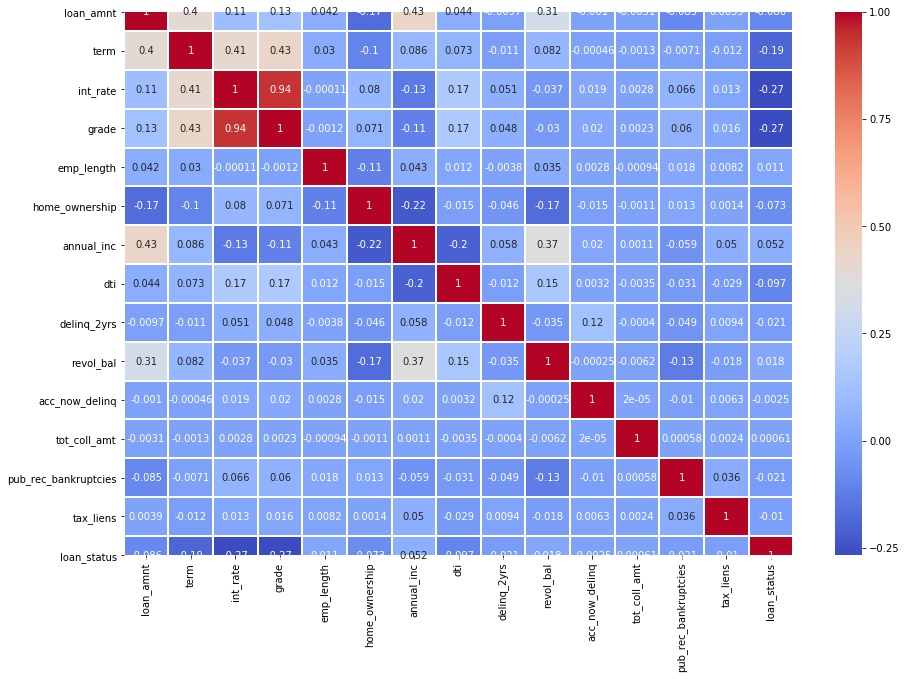

In [75]:
### lets look at the correlation again

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

As we have suspected, grade has a high correlation with interest rate - so we will keep interest rate and remove grade.

In [76]:
df_loan_default_features.drop('grade', axis=1, inplace=True)

<Figure size 2160x1440 with 0 Axes>

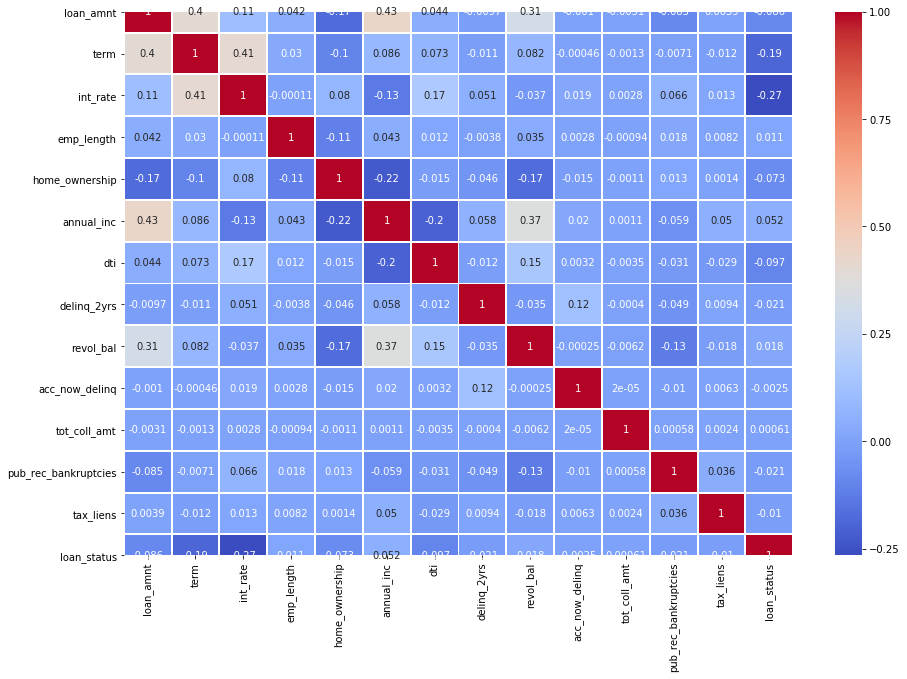

In [77]:
### lets look at the correlation again

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

In [78]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183710 entries, 100 to 2260664
Data columns (total 14 columns):
loan_amnt               1183710 non-null float64
term                    1183710 non-null int8
int_rate                1183710 non-null float64
emp_length              1183710 non-null int8
home_ownership          1183710 non-null int8
annual_inc              1183710 non-null float64
dti                     1183710 non-null float64
delinq_2yrs             1183710 non-null float64
revol_bal               1183710 non-null int64
acc_now_delinq          1183710 non-null float64
tot_coll_amt            1183710 non-null float64
pub_rec_bankruptcies    1183710 non-null float64
tax_liens               1183710 non-null float64
loan_status             1183710 non-null int8
dtypes: float64(9), int64(1), int8(4)
memory usage: 103.9 MB


So now we have 14 features that we will use to model

In [79]:
### Lets make a copy of our dataframe in case something goes wrong
df_features_final = df_loan_default_features.copy()

## Supervised Machine learning algorithms for prediction

In [80]:
### Lets create our x and y variables
X = df_loan_default_features.copy()
y = df_loan_default_features['loan_status']
X = df_loan_default_features.drop(['loan_status'], axis=1)

In [81]:
### spliting test and train dataset
### Taking 30% of the data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Naive Bayes

In [82]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [83]:
### Accuracy of the model with training data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, naive_bayes.predict(X_train))))

accuracy score: 0.7793



In [84]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, naive_bayes.predict(X_test))))

accuracy score: 0.7789



In [85]:
###
print("Classification Report: \n {}\n".format(classification_report(y_train, naive_bayes.predict(X_train))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.00      0.00    182875
           1       0.78      1.00      0.88    645722

    accuracy                           0.78    828597
   macro avg       0.63      0.50      0.44    828597
weighted avg       0.71      0.78      0.68    828597




In [86]:
###
print("Classification Report: \n {}\n".format(classification_report(y_test, naive_bayes.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.26      0.00      0.00     78471
           1       0.78      1.00      0.88    276642

    accuracy                           0.78    355113
   macro avg       0.52      0.50      0.44    355113
weighted avg       0.67      0.78      0.68    355113




In [87]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, naive_bayes.predict(X_train))))

Confusion Matrix: 
 [[    50 182825]
 [    55 645667]]



In [88]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, naive_bayes.predict(X_test))))

Confusion Matrix: 
 [[    15  78456]
 [    42 276600]]



# MAGDA
* 78456 are identified as false negetive - they are identified as default when they should not?
* 42 are identified as default when they should not? False positive
* what does this mean for the model?

### Logstic regression

In [89]:
### Create and fit the model
logistic_regression = LogisticRegression(C = 0.0001,random_state=21)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
### Accuracy of the model with training data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, logistic_regression.predict(X_train))))

accuracy score: 0.7793



In [91]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, logistic_regression.predict(X_test))))

accuracy score: 0.7790



In [92]:
###
print("Classification Report: \n {}\n".format(classification_report(y_train, logistic_regression.predict(X_train))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    182875
           1       0.78      1.00      0.88    645722

    accuracy                           0.78    828597
   macro avg       0.39      0.50      0.44    828597
weighted avg       0.61      0.78      0.68    828597




In [93]:
###
print("Classification Report: \n {}\n".format(classification_report(y_test, logistic_regression.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     78471
           1       0.78      1.00      0.88    276642

    accuracy                           0.78    355113
   macro avg       0.39      0.50      0.44    355113
weighted avg       0.61      0.78      0.68    355113




In [94]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, logistic_regression.predict(X_train))))

Confusion Matrix: 
 [[     0 182875]
 [     0 645722]]



In [95]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, logistic_regression.predict(X_test))))

Confusion Matrix: 
 [[     0  78471]
 [     0 276642]]



In [207]:
#result = cross_val_score(logistic_regression, X_train, y_train, cv=10, scoring='accuracy')
#print("Average Accuracy: \t {0:.4f}".format(np.mean(result)))

# MAGDA
* Did we mistakenly identify 0 default loan? so there are no false negetive?
* did we identify 182875 default loans by mistake when thye should not? 
* does this mean that the model is overfitted?

- the accuracy scores are similar to Naive bayes... given that they are both classification models is that right?

### Linear regression

In [96]:
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

# We fit an OLS model using statsmodels
linear_regression = sm.OLS(y_train, X_train_ols).fit()
# We print the summary results
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6186.
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:52:10   Log-Likelihood:            -4.0807e+05
No. Observations:              828597   AIC:                         8.162e+05
Df Residuals:                  828583   BIC:                         8.163e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4191 

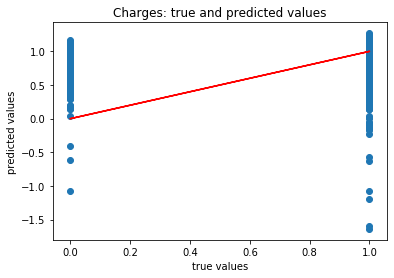

Mean absolute error of the prediction is: 0.31514366979663366
Mean squared error of the prediction is: 0.15695081878455563
Root mean squared error of the prediction is: 0.3961701891669231
Mean absolute percentage error of the prediction is: inf


In [97]:
y_preds = linear_regression.predict(X_test_ols)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test,y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [215]:
### Accuracy of the model with training data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, linear_regression.predict(X_train_ols))))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [98]:
### Accuracy of the model with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, linear_regression.predict(X_test_ols))))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
###
print("Classification Report: \n {}\n".format(classification_report(y_train, linear_regression.predict(X_train_ols))))

In [ ]:
###
print("Classification Report: \n {}\n".format(classification_report(y_test, linear_regression.predict(X_test_ols))))

In [ ]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, linear_regression.predict(X_train_ols))))

In [ ]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, linear_regression.predict(X_test_ols))))

# Magda
- 
- what is happening here? the graph looks terrible... ??? I dont' think we can use linear regression here since out outcome is categorical??? 
- don't think linear regression is working

### KNN

In [114]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, knn.predict(X_train))))

In [ ]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, knn.predict(X_test))))

In [ ]:
###
print("Classification Report: \n {}\n".format(classification_report(y_train, knn.predict(X_train))))

In [ ]:
###
print("Classification Report: \n {}\n".format(classification_report(y_test, knn.predict(X_test))))

In [ ]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, knn.predict(X_train))))

In [ ]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, knn.predict(X_test))))

###  Random forrest
* In logistic regression, we saw that the model might have been overfitted - Random forrest tends not to overfit - so lets try that

In [99]:
### Create and fit the model
random_forrest = RandomForestClassifier(n_estimators=40, random_state=21)
random_forrest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [100]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, random_forrest.predict(X_train))))

accuracy score: 0.9996



In [101]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, random_forrest.predict(X_test))))

accuracy score: 0.7747



In [102]:
###
print("Classification Report: \n {}\n".format(classification_report(y_train, random_forrest.predict(X_train))))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    182875
           1       1.00      1.00      1.00    645722

    accuracy                           1.00    828597
   macro avg       1.00      1.00      1.00    828597
weighted avg       1.00      1.00      1.00    828597




In [103]:
###
print("Classification Report: \n {}\n".format(classification_report(y_test, random_forrest.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.15      0.23     78471
           1       0.80      0.95      0.87    276642

    accuracy                           0.77    355113
   macro avg       0.63      0.55      0.55    355113
weighted avg       0.73      0.77      0.73    355113




In [104]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, random_forrest.predict(X_train))))

Confusion Matrix: 
 [[182518    357]
 [     0 645722]]



In [105]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, random_forrest.predict(X_test))))

Confusion Matrix: 
 [[ 11666  66805]
 [ 13213 263429]]



# SVM

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

In [ ]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, svm.predict(X_train))))

In [ ]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, svm.predict(X_test))))

In [ ]:
###
print("Classification Report: \n {}\n".format(classification_report(y_train, svm.predict(X_train))))

In [ ]:
###
print("Classification Report: \n {}\n".format(classification_report(y_test, svm.predict(X_test))))

In [ ]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, svm.predict(X_train))))

In [ ]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, svm.predict(X_test))))

## Boosting model

In [106]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
boosting_model = ensemble.GradientBoostingClassifier(**params)
boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [107]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, boosting_model.predict(X_train))))

accuracy score: 0.7840



In [108]:
### accuracy on test -
# Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, boosting_model.predict(X_test))))

accuracy score: 0.7836



In [109]:
###
print("Classification Report: \n {}\n".format(classification_report(y_train, boosting_model.predict(X_train))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.10      0.16    182875
           1       0.79      0.98      0.88    645722

    accuracy                           0.78    828597
   macro avg       0.68      0.54      0.52    828597
weighted avg       0.74      0.78      0.72    828597




In [110]:
###
print("Classification Report: \n {}\n".format(classification_report(y_test, boosting_model.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.09      0.16     78471
           1       0.79      0.98      0.88    276642

    accuracy                           0.78    355113
   macro avg       0.68      0.54      0.52    355113
weighted avg       0.74      0.78      0.72    355113




In [111]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, boosting_model.predict(X_train))))

Confusion Matrix: 
 [[ 17380 165495]
 [ 13513 632209]]



In [112]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, boosting_model.predict(X_test))))

Confusion Matrix: 
 [[  7419  71052]
 [  5802 270840]]



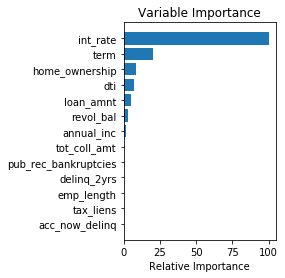

In [113]:
feature_importance = boosting_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Summary

We need to take care of categorical variables and make them numeric. The easy way to do this is to use category. 

Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.

In [ ]:
### test for normality

jb_stats = jarque_bera(df_lifeExpectancy3)
norm_stats = normaltest(df_lifeExpectancy3)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


In [ ]:
### taking a few features and testing
jb_stats = jarque_bera(df_lifeExpectancy3.schooling)
norm_stats = normaltest(df_lifeExpectancy3.schooling)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_lifeExpectancy3.thinness_5_9_years)
norm_stats = normaltest(df_lifeExpectancy3.thinness_5_9_years)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_lifeExpectancy3.total_expenditure)
norm_stats = normaltest(df_lifeExpectancy3.total_expenditure)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

### looks like these don't look normal